# Superstore Sales Dataset
### Predict Sales using Time Series

## Deskripsi dataset

#### Konten
- Time series analysis deals with time series based data to extract patterns for predictions and other characteristics of the data. It uses a model for forecasting future values in a small time frame based on previous observations. It is widely used for non-stationary data, such as economic data, weather data, stock prices, and retail sales forecasting.

#### Tujuan
- Retail dataset of a global superstore for 4 years.
- Perform EDA and Predict the sales of the next 7 days from the last date of the Training dataset!

## Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [3]:
df = pd.read_csv('../Datasets/superstore_sales.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## EDA (Exploratory Data Analyst)

#### dimensi data

In [4]:
df.shape

(9800, 18)

#### Tipe data features/kolom

In [5]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

#### Menampilkan statiska deskiptif tentang dataset

In [7]:
# numeric data
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [8]:
# categorical data
df.describe(exclude='number')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
unique,4922,1230,1326,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,34,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47


#### Drop kolom yang tidak dibutuhkan

In [9]:
df.drop(['Row ID'], axis=1, inplace=True)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


#### check missing value, duplicate data & outliers data

##### cek missing value

In [10]:
df.isna().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [11]:
# drop data Nan
df.dropna(axis=0, inplace=True)
df.shape

(9789, 17)

Oke data yang missing value/Nan sudah dihilangkan

#####  cek duplicate data

In [12]:
df[df.duplicated(keep=False)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
3405,US-2015-150119,23/04/2015,27/04/2015,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372
3406,US-2015-150119,23/04/2015,27/04/2015,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [13]:
# drop data duplicated
df.drop_duplicates(keep='first', inplace=True)
df.shape

(9788, 17)

Ada dua data duplikat lalu kita drop satu data duplikat dan sisakan satu data yang duplikat tadi

##### Cek outliers pada data

In [14]:
# cek outliers kita akan memakai teknik IQR (Interquartile)
# karna kita akan menggunakan kolom dengan tipe data datetime dan juga kolom sales untuk forecasting, maka kita akan cek otliers
# pada kolom tersebut

Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
higher = Q3 + 1.5 * IQR

df2 = df[(df['Sales'] > lower) & (df['Sales'] < higher)]
df2

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368
5,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860
6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376


### Mengubah data tanggal menjadi tipe data `Datetime`

In [15]:
# Kolom Order Date
df2[['Order Date','Ship Date']] = df2[['Order Date','Ship Date']].apply(pd.to_datetime)
df2.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960
2,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620
4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368
5,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860
6,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8643 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       8643 non-null   object        
 1   Order Date     8643 non-null   datetime64[ns]
 2   Ship Date      8643 non-null   datetime64[ns]
 3   Ship Mode      8643 non-null   object        
 4   Customer ID    8643 non-null   object        
 5   Customer Name  8643 non-null   object        
 6   Segment        8643 non-null   object        
 7   Country        8643 non-null   object        
 8   City           8643 non-null   object        
 9   State          8643 non-null   object        
 10  Postal Code    8643 non-null   float64       
 11  Region         8643 non-null   object        
 12  Product ID     8643 non-null   object        
 13  Category       8643 non-null   object        
 14  Sub-Category   8643 non-null   object        
 15  Product Name   8643 n

## Menyiapkan data untuk `Forecasting`

### Melakukan forecasting terhadap kolom `Order date` untuk memprediksi seminggu kedepan

### Cek dataset apakah datanya stationer atau non stationer

In [17]:
df_od = pd.DataFrame(df2[['Order Date','Sales']])
df_od

,Order Date,Sales
0,2017-08-11,261.960
2,2017-12-06,14.620
4,2016-11-10,22.368
5,2015-09-06,48.860
6,2015-09-06,7.280
...,...,...
9795,2017-05-21,3.798
9796,2016-12-01,10.368
9797,2016-12-01,235.188
9798,2016-12-01,26.376


In [18]:
# set index menjadi kolom Order Date
df_od.set_index('Order Date', inplace=True)
df_od.sort_values(by=['Order Date'], inplace=True, ascending=True)
df_od

,Sales
Order Date,
2015-01-02,468.900
2015-01-03,457.568
2015-01-03,129.552
2015-01-03,63.552
2015-01-03,17.472
...,...
2018-12-30,52.776
2018-12-30,20.720
2018-12-30,323.136


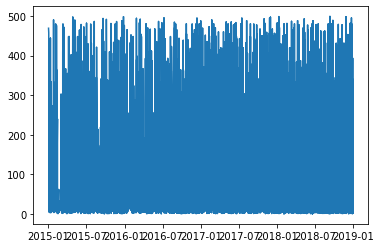

In [37]:
plt.plot(df_od['Sales'])
plt.show()

In [69]:
df3 = df2[["Sales"]].copy()
df3

,Sales
0,261.960
2,14.620
4,22.368
5,48.860
6,7.280
...,...
9795,3.798
9796,10.368
9797,235.188
9798,26.376


Data tersebut terlihat stationer terlihat di mean dan variasi nya konstan

### Cek stationer dengan metode adfuller
- p > 0.05 : non stationer
- p < 0.05 : stationer

In [66]:
from statsmodels.tsa.stattools import adfuller

def ad_test(data):
    dftest = adfuller(df3, autolag='AIC')
    print(f'1. ADF: {dftest[0]}')
    print(f'2. P-Value: {dftest[1]}')
    print(f'3. Num of Lags: {dftest[2]}')
    print(f'4. Num Of Observations Used For ADF Regression: {dftest[3]}')
    print(f'5. Critical Values: ')
    for key, val in dftest[4].items():
        print('\t',key , ':' , val)
ad_test(df_od['Sales'])

1. ADF: -55.138412170856874
2. P-Value: 0.0
3. Num of Lags: 2
4. Num Of Observations Used For ADF Regression: 8640
5. Critical Values: 
	 1% : -3.4311070884129804
	 5% : -2.8618745822433644
	 10% : -2.5669480931846924


Terlihat P-Value < 0.05 yaitu 0.0 artinya data stationer

### Autocorrelation Function (ACF)

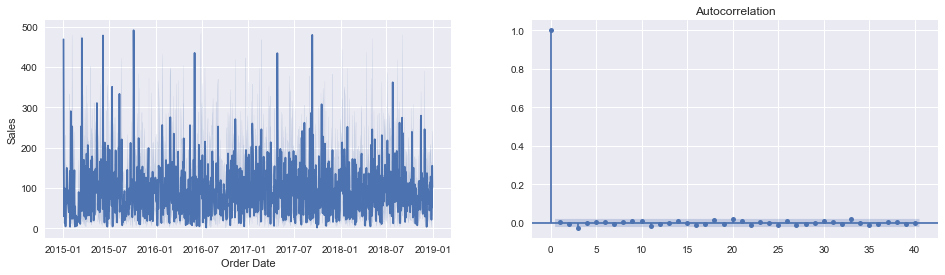

In [73]:
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

sns.lineplot(data=df2, x='Order Date', y='Sales', ax=axes[0])
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
# ax1.plot(df3.Sales)
# ax1.set_title('Original')
# ax1.set_ylim([0,1000])
plot_acf(df3.Sales, ax=axes[1]);
plt.show()

### Differencing

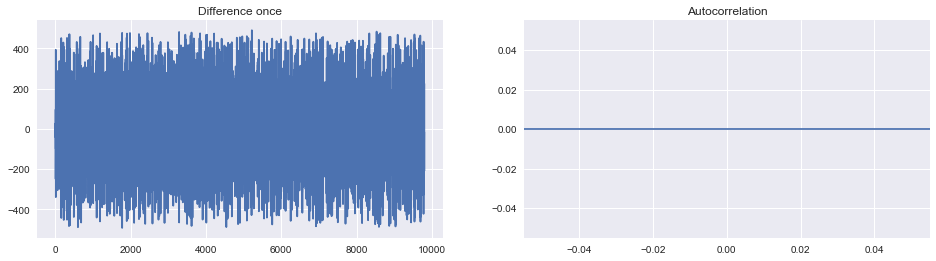

In [77]:
diff = df3.Sales.diff()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

Karna data stationer maka differencingnya adalah 0 

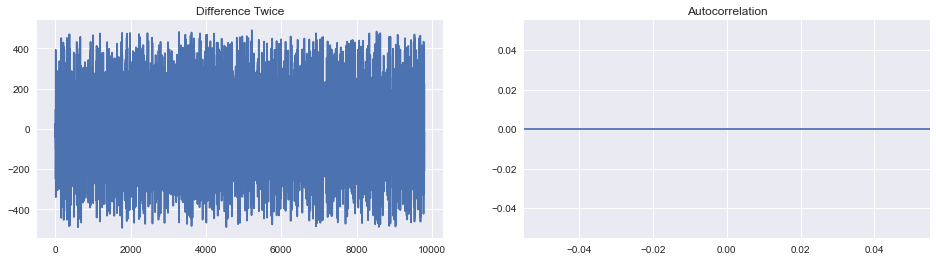

In [76]:
diff = df3.Sales.diff()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference Twice")
plot_acf(diff, ax=ax2);

In [78]:
# Get differemcing automatically

from pmdarima.arima.utils import ndiffs

ndiffs(df3.Sales, test='adf')

0

### cari P (AR)

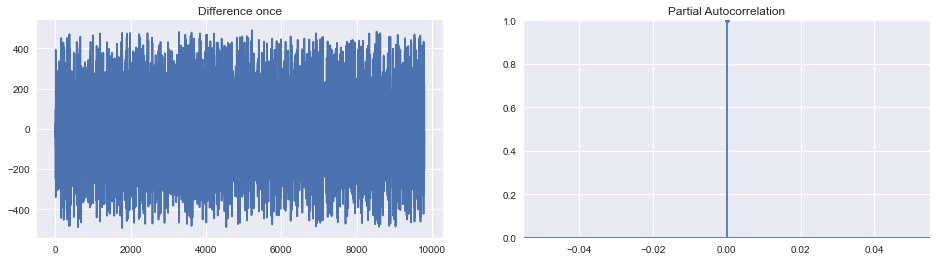

In [81]:
from statsmodels.graphics.tsaplots import plot_pacf

diff = df3.Sales.diff()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

### Cari q (MA)

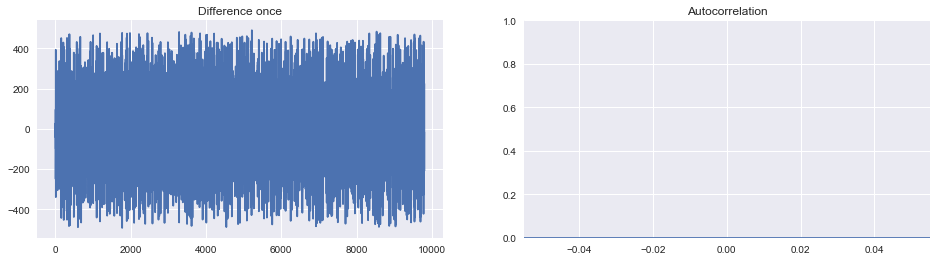

In [82]:
diff = df3.Sales.diff()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

### Forecasting menggunakan ARIMA

In [94]:
import pmdarima as pmd
arim = pmd.auto_arima(df3['Sales'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=106456.714, Time=4.98 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=106449.055, Time=0.52 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=106450.817, Time=1.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=106450.968, Time=2.54 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=110835.306, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=106452.805, Time=4.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 13.840 seconds


In [83]:
# split data
n = int(len(df) * 0.8)
train = df3.Sales[:n]
test = df3.Sales[n:]
print(train.shape, test.shape)

(7830,) (813,)


In [85]:
# membuat model ARIMA 
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df3['Sales'],order=(0,0,0))
results = model.fit(disp=0)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                 8643
Model:                     ARMA(0, 0)   Log Likelihood              -53222.528
Method:                           css   S.D. of innovations            114.313
Date:                Tue, 17 Aug 2021   AIC                         106449.055
Time:                        09:05:41   BIC                         106463.184
Sample:                             0   HQIC                        106453.873
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.9738      1.230     75.613      0.000      90.564      95.384
==============================================================================
"""

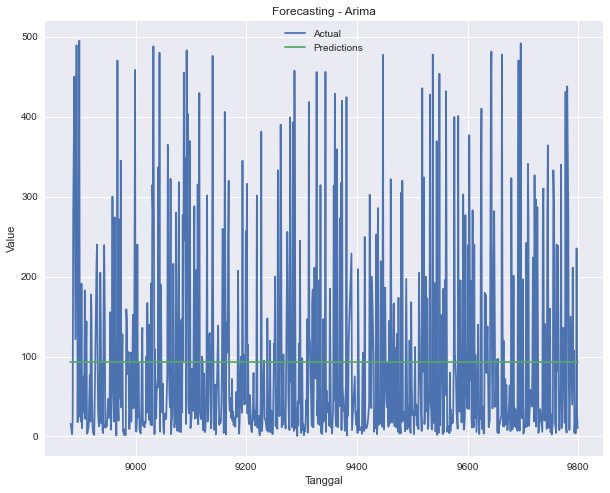

In [92]:
# predict model
import matplotlib.pyplot as plt

# Actual vs Fitted
# results.plot_predict(
#     start=1,
#     end=60,
#     dynamic=False,
# );
start=len(train)
end=len(train)+len(test)-1
pred=results.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')

plt.figure(figsize=(10,8))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, pred, label='Predictions')
plt.title('Forecasting - Arima')
plt.ylabel('Value')
plt.xlabel('Tanggal')
plt.legend()
plt.show()

In [93]:
# evaluasi hasil model
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test, pred))
rmse

119.08327985455671

In [27]:
# forecast = model.forecast(steps=7)

### Forecasting menggunakan fbprophet

In [28]:
df_fb = df_od.reset_index()
df_fb

,Order Date,Sales
0,2015-01-02,468.900
1,2015-01-03,457.568
2,2015-01-03,129.552
3,2015-01-03,63.552
4,2015-01-03,17.472
...,...,...
8638,2018-12-30,52.776
8639,2018-12-30,20.720
8640,2018-12-30,323.136
8641,2018-12-30,13.904


In [29]:
df_fb.columns = ['ds','y']
df_fb.head()

,ds,y
0,2015-01-02,468.900
1,2015-01-03,457.568
2,2015-01-03,129.552
3,2015-01-03,63.552
4,2015-01-03,17.472


In [30]:
from fbprophet import Prophet

# membuat objek model
model_fb = Prophet(interval_width=0.96, daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
model_fb = model_fb.fit(df_fb)
model_fb

In [31]:
# make predictions
future = model_fb.make_future_dataframe(periods=7, freq='D')
forecast = model_fb.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,392.494747,-133.056142,324.928352,392.494747,392.494747,-296.880208,-296.880208,-296.880208,-302.74304,...,-1.191135,-1.191135,-1.191135,7.053966,7.053966,7.053966,0.0,0.0,0.0,95.614539
1,2015-01-03,392.502689,-121.504070,316.315043,392.502689,392.502689,-296.106774,-296.106774,-296.106774,-302.74304,...,-0.404283,-0.404283,-0.404283,7.040549,7.040549,7.040549,0.0,0.0,0.0,96.395915
2,2015-01-04,392.510630,-129.405440,330.276327,392.510630,392.510630,-297.819840,-297.819840,-297.819840,-302.74304,...,-2.033294,-2.033294,-2.033294,6.956494,6.956494,6.956494,0.0,0.0,0.0,94.690791
3,2015-01-06,392.526513,-135.659299,330.913844,392.526513,392.526513,-298.034950,-298.034950,-298.034950,-302.74304,...,-1.906292,-1.906292,-1.906292,6.614382,6.614382,6.614382,0.0,0.0,0.0,94.491563
4,2015-01-07,392.534455,-128.428293,332.536105,392.534455,392.534455,-295.964829,-295.964829,-295.964829,-302.74304,...,0.400674,0.400674,0.400674,6.377537,6.377537,6.377537,0.0,0.0,0.0,96.569626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2019-01-02,395.412708,-124.393673,335.261893,395.412422,395.412708,-295.288400,-295.288400,-295.288400,-302.74304,...,0.400674,0.400674,0.400674,7.053966,7.053966,7.053966,0.0,0.0,0.0,100.124308
1220,2019-01-03,395.408297,-140.658598,331.125985,395.407743,395.408426,-290.401584,-290.401584,-290.401584,-302.74304,...,5.300907,5.300907,5.300907,7.040549,7.040549,7.040549,0.0,0.0,0.0,105.006714
1221,2019-01-04,395.403887,-126.266935,329.520032,395.402871,395.404305,-296.977680,-296.977680,-296.977680,-302.74304,...,-1.191135,-1.191135,-1.191135,6.956494,6.956494,6.956494,0.0,0.0,0.0,98.426207
1222,2019-01-05,395.399476,-133.901845,312.334336,395.398049,395.400170,-296.336306,-296.336306,-296.336306,-302.74304,...,-0.404283,-0.404283,-0.404283,6.811017,6.811017,6.811017,0.0,0.0,0.0,99.063170


In [32]:
df_pred = forecast[['ds','yhat']]
df_pred.head()

,ds,yhat
0,2015-01-02,95.614539
1,2015-01-03,96.395915
2,2015-01-04,94.690791
3,2015-01-06,94.491563
4,2015-01-07,96.569626


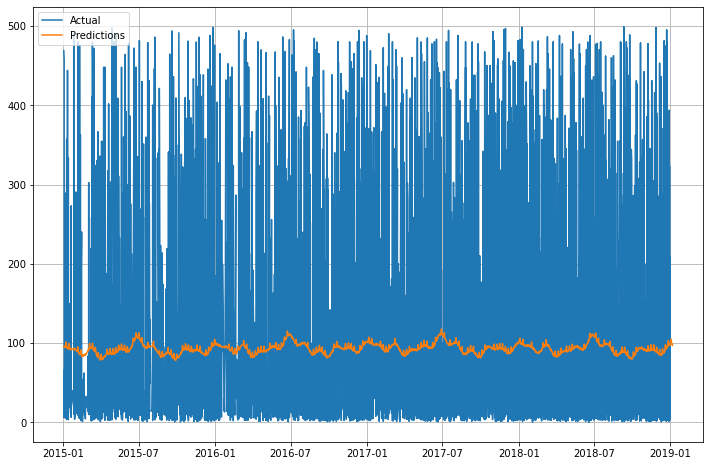

In [33]:
plt.figure(figsize=(12,8))
plt.plot(df_fb['ds'], df_fb['y'], label='Actual')
plt.plot(df_pred['ds'], df_pred['yhat'], label='Predictions')
plt.grid()
plt.legend()
plt.show()

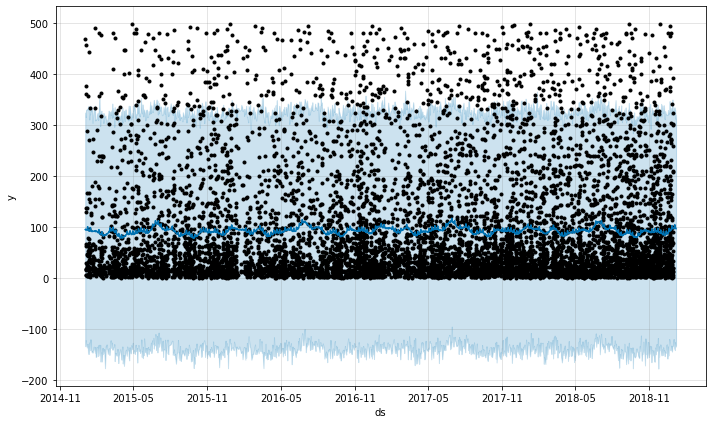

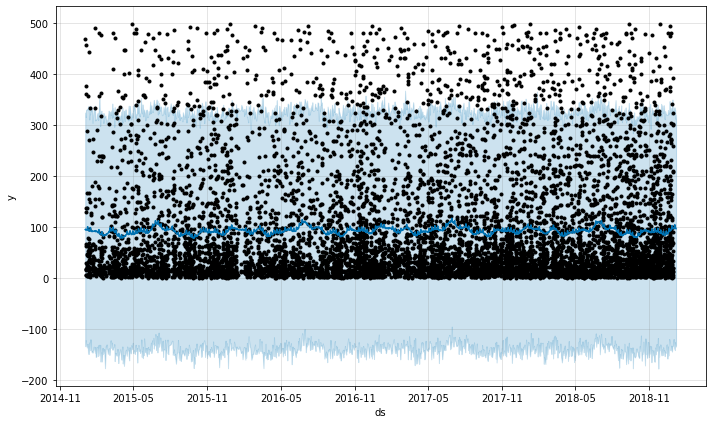

In [34]:
model_fb.plot(forecast)

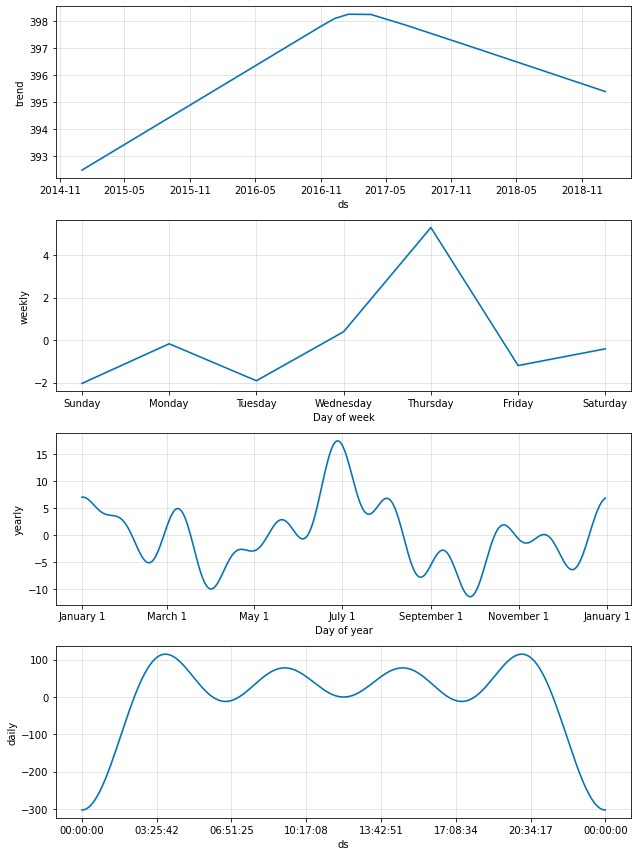

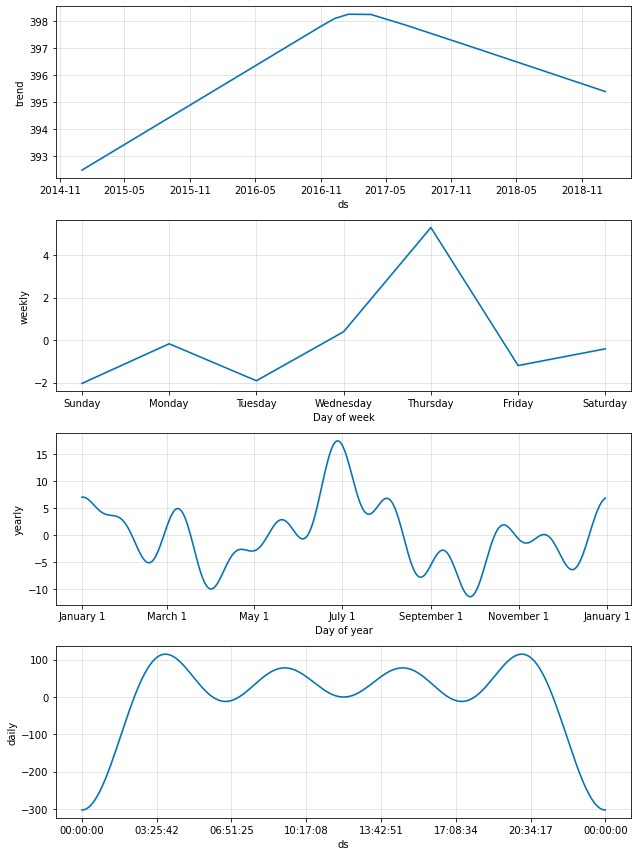

In [35]:
model_fb.plot_components(forecast)